#  Campus Placement Company Prediction System

Import Required Libraries 


In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

Load Dataset

In [102]:
df = pd.read_excel('data/vvit_placements_data.xlsx')
df.head(10)

,Company,Total_Selected,CTC_LPA,Year
0,AMAZON WOW,1,29.00,2024
1,Walmart,2,23.00,2024
2,Flipkart,1,11.50,2024
3,Infosys,3,9.50,2024
4,IBM,1,9.00,2024
5,TCS NQT - (Prime),2,9.00,2024
6,Baby Cloud,1,8.00,2024
7,Meru Data LLP,4,7.28,2024
8,AMD India Pvt Ltd,1,7.20,2024
9,TCS CodeVita,1,7.00,2024


Checking if the dataset contains any missing values

In [103]:
df.isnull().sum()

Company           0
Total_Selected    0
CTC_LPA           0
Year              0
dtype: int64

There are no missing values in the dataset

Check if the dataset contains duplicate values or not 

In [104]:
df.duplicated().sum()

np.int64(0)

There are no duplicated values in the dataset

Now lets us know about the dataset

In [105]:
df.shape

(576, 4)

In [106]:
df.describe()

,Total_Selected,CTC_LPA,Year
count,576.000000,576.000000,576.000000
mean,11.848958,4.057674,3694.885417
std,23.991515,3.385725,5265.128098
min,1.000000,1.200000,2016.000000
25%,1.000000,2.400000,2018.000000
50%,3.000000,3.500000,2021.000000
75%,10.000000,4.212500,2023.000000
max,192.000000,44.000000,20220.000000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         576 non-null    object 
 1   Total_Selected  576 non-null    int64  
 2   CTC_LPA         576 non-null    float64
 3   Year            576 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 18.1+ KB


By the above We can know that the data of the features "Company" is of object datatype but the model donot understand the object datatype the model can only understand the numerical datatype so we want to convert that into numerical datatype

In [108]:
df['Company'].unique()

array(['AMAZON WOW', 'Walmart', 'Flipkart', 'Infosys', 'IBM\xa0',
       'TCS NQT - (Prime)', 'Baby Cloud', 'Meru Data LLP',
       'AMD India Pvt Ltd', 'TCS CodeVita', 'TCS Salesforce - (Digital)',
       'TCS NQT - (Digital)', 'Infor', 'Accenture- (VSP)',
       'VTS Enterprises', 'Naamly India Pvt Ltd', 'Azista Industries',
       'BOSCH(GAT)', 'COGNIZANT -GenCPro', 'Drag and Drop', 'Odoo',
       'HYUNDAI Motors\xa0', 'Deloitte', 'Broadridge India',
       'Linkfields Innovations', 'Accenture(Off -Campus)',
       'EY Global Delivery Services India LLP', 'Accenture (VSP)',
       'Deloitte -USI', 'Quadratyx', 'CGI', 'Voxai IT Solutions',
       'Accenture iAspire /AIC', 'COGNIZANT Phase- GenC',
       'HBl Power Systems (R & D)', 'Dexterity Edutech Pvt Ltd',
       'Capgemini', 'Magnaquest Technologies Ltd\xa0',
       '7 Dots Smart Solutions', 'SSIT', 'LG polymers',
       'Rite Software\xa0 Solutions and Services', 'SILO Technologies',
       'DC InfoTech', 'Atlas Systems', 'Syno

In [109]:
df['Company'].nunique()
# It gives the no.of unique values count in the column


485

After executing the above commands we came to a conclusion that the shape of the dataset is (576,4) in that Company is a column with 485 unique values so as it is in object datatype we want to convert it into numerical datatype we can do it by some encoding techniques and as the count is very high for Company column we use "Frequency encoding" technique to convert it

In [110]:
col_to_encode = 'Company'
freq_encoding = df[col_to_encode].value_counts().to_dict()
# This returns a dictionary with each unique category as key and its frequency (count) as value
print(freq_encoding)

{'IBM': 5, 'Infosys': 4, 'CGI': 4, 'NTT DATA': 4, 'Capgemini': 4, 'Hexaware': 4, 'HCL': 4, 'TCS': 4, 'EFFTRONICS': 4, 'CTS': 3, 'ITC': 3, 'VEDA IIT': 3, 'WIPRO': 3, 'CTRLS': 3, 'SUTHERLAND GLOBAL': 3, 'INFOSYS': 3, 'FSS': 2, 'NALSOFT': 2, 'SYNTEL': 2, 'FISSION INFOTECH': 2, 'JUST DIAL': 2, 'VEM TECHNOLOGIES': 2, 'ATLAS SYSTEMS': 2, 'Global Logic': 2, 'BYJUS': 2, 'TECH MAHINDRA': 2, 'ALLSEC TECHNOLOGIES': 2, 'VEE TECHNOLOGIES': 2, 'Deloitte': 2, 'FACE': 2, 'YAMYAH': 2, 'TECHNOVERT': 2, 'MIRACLE': 2, 'AIS GLASS': 2, 'SNOVASYS': 2, 'Efftronics': 2, 'VIRTUSA-NEURALHACK': 2, 'CADEPLOY': 2, 'RASTER ENGINEERING': 2, 'DBS': 2, 'SDVVL': 2, 'Technovert': 2, 'EPAM': 2, 'HGS': 2, 'Tech Mahindra': 2, 'Miracle': 2, 'DXC': 2, 'Wipro-NTH': 2, 'TCS Code Vita': 2, 'Zensar': 2, 'Wipro TNP': 2, 'ZenQ': 2, 'Unschool': 2, 'TCS NINJA': 2, 'Huscon': 2, 'KAAR Technologies': 2, 'Mindtree': 2, 'KJ Systems': 2, 'SPM': 2, 'CTS Gen C': 2, 'CYIENT': 2, 'Accenture': 2, 'Mu-Sigma': 2, 'Walmart': 2, 'AMAZON WOW': 2, 'E

In [111]:
df[col_to_encode + '_encoded'] = df[col_to_encode].map(freq_encoding)
# This replaces each value in the column with its corresponding frequency
print(df)

         Company  Total_Selected  CTC_LPA  Year  Company_encoded
0     AMAZON WOW               1     29.0  2024                2
1        Walmart               2     23.0  2024                2
2       Flipkart               1     11.5  2024                1
3        Infosys               3      9.5  2024                4
4           IBM                1      9.0  2024                1
..           ...             ...      ...   ...              ...
571  R K Venuzia               1      1.8  2016                1
572       Huscon               4      1.5  2016                2
573          IBM               2      2.4  2016                5
574         RMSI               7      2.0  2016                1
575       ETOUCH               1      2.4  2016                1

[576 rows x 5 columns]


Now the company column is converted into numerical datatype 

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          576 non-null    object 
 1   Total_Selected   576 non-null    int64  
 2   CTC_LPA          576 non-null    float64
 3   Year             576 non-null    int64  
 4   Company_encoded  576 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 22.6+ KB


See we can see the difference Company is of object datatype and Company is of int(numerical) datatype

Optional: We can remove the Company column from the dataset

In [113]:
df_copy = df.copy()

I perform this funtion to make changes in the dataset by this the orginal dataset remains unchanged.

In [114]:
df_copy.head()

,Company,Total_Selected,CTC_LPA,Year,Company_encoded
0,AMAZON WOW,1,29.0,2024,2
1,Walmart,2,23.0,2024,2
2,Flipkart,1,11.5,2024,1
3,Infosys,3,9.5,2024,4
4,IBM,1,9.0,2024,1


In [97]:
df_copy.drop(columns=['Company'],axis=1,inplace=True)
#  By the above code we can remove the column Company from the dataset

In [115]:
df_copy

,Company,Total_Selected,CTC_LPA,Year,Company_encoded
0,AMAZON WOW,1,29.0,2024,2
1,Walmart,2,23.0,2024,2
2,Flipkart,1,11.5,2024,1
3,Infosys,3,9.5,2024,4
4,IBM,1,9.0,2024,1
...,...,...,...,...,...
571,R K Venuzia,1,1.8,2016,1
572,Huscon,4,1.5,2016,2
573,IBM,2,2.4,2016,5
574,RMSI,7,2.0,2016,1


Now we want to change the Year column

In [116]:
df_copy['Year'].unique()

array([ 2024,  2023,  2022,  2021, 20220,  2019,  2018,  2017,  2016])

In [117]:
df_copy['Year'].nunique()

9

Now by the above code we can know that there are 9 unique values out of 576 values which is very less in comparision so the best encoding technique to convert the year column datatype into numerical datatype is "OneHotEncoding" technique

In [118]:
col_to_encode = 'Year'
df_encoded = pd.get_dummies(df_copy,columns=[col_to_encode],prefix=col_to_encode)

In [119]:
print(df_encoded.head())

      Company  Total_Selected  CTC_LPA  Company_encoded  Year_2016  Year_2017  \
0  AMAZON WOW               1     29.0                2      False      False   
1     Walmart               2     23.0                2      False      False   
2    Flipkart               1     11.5                1      False      False   
3     Infosys               3      9.5                4      False      False   
4        IBM                1      9.0                1      False      False   

   Year_2018  Year_2019  Year_2021  Year_2022  Year_2023  Year_2024  \
0      False      False      False      False      False       True   
1      False      False      False      False      False       True   
2      False      False      False      False      False       True   
3      False      False      False      False      False       True   
4      False      False      False      False      False       True   

   Year_20220  
0       False  
1       False  
2       False  
3       False  
4     

In [120]:
df_copy = df_encoded

In [121]:
df_copy.head()

,Company,Total_Selected,CTC_LPA,Company_encoded,Year_2016,Year_2017,Year_2018,Year_2019,Year_2021,Year_2022,Year_2023,Year_2024,Year_20220
0,AMAZON WOW,1,29.0,2,False,False,False,False,False,False,False,True,False
1,Walmart,2,23.0,2,False,False,False,False,False,False,False,True,False
2,Flipkart,1,11.5,1,False,False,False,False,False,False,False,True,False
3,Infosys,3,9.5,4,False,False,False,False,False,False,False,True,False
4,IBM,1,9.0,1,False,False,False,False,False,False,False,True,False


In [122]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          576 non-null    object 
 1   Total_Selected   576 non-null    int64  
 2   CTC_LPA          576 non-null    float64
 3   Company_encoded  576 non-null    int64  
 4   Year_2016        576 non-null    bool   
 5   Year_2017        576 non-null    bool   
 6   Year_2018        576 non-null    bool   
 7   Year_2019        576 non-null    bool   
 8   Year_2021        576 non-null    bool   
 9   Year_2022        576 non-null    bool   
 10  Year_2023        576 non-null    bool   
 11  Year_2024        576 non-null    bool   
 12  Year_20220       576 non-null    bool   
dtypes: bool(9), float64(1), int64(2), object(1)
memory usage: 23.2+ KB


# Visualization

Correlation matrix for numerical values

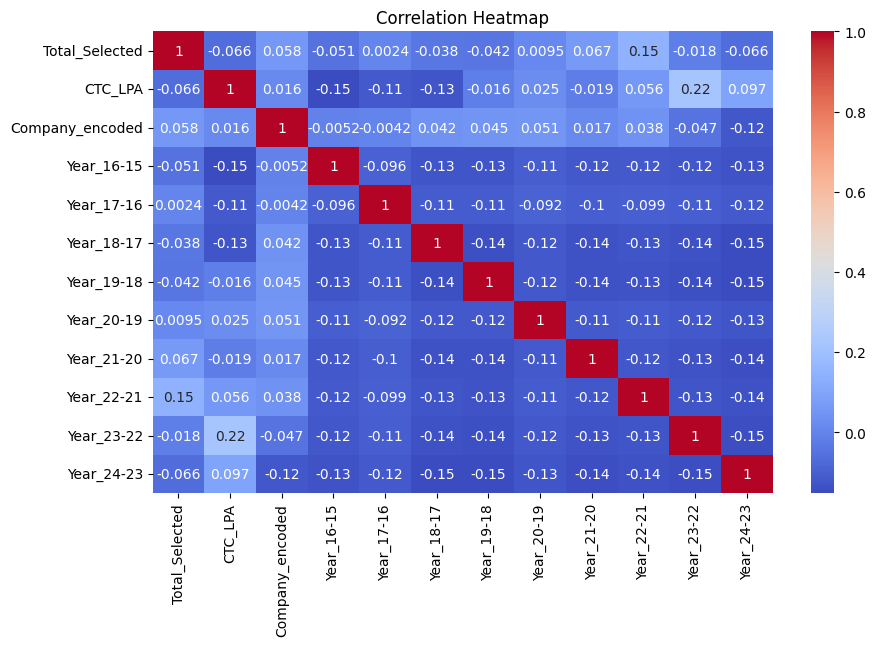

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(df_copy.corr(numeric_only=True),annot=True,cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Visualize company selection trends

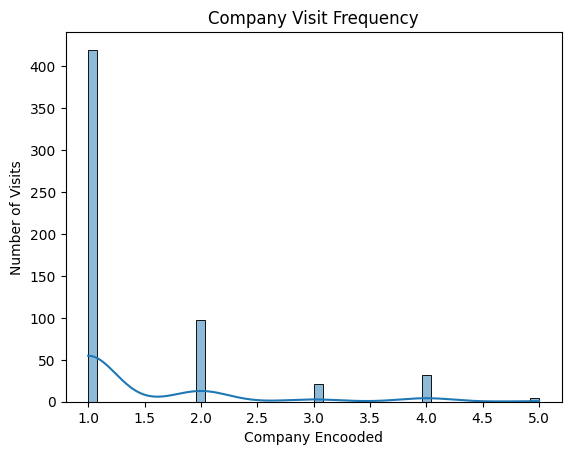

In [44]:
plt.Figure(figsize=(10,4))
sns.histplot(df_copy['Company_encoded'],bins=50,kde=True)
plt.title("Company Visit Frequency")
plt.xlabel("Company Encooded")
plt.ylabel("Number of Visits")
plt.show()

CTC distribution

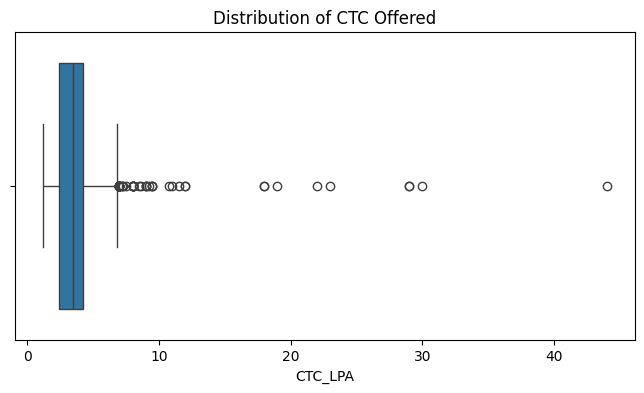

In [45]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_copy['CTC_LPA'])
plt.title("Distribution of CTC Offered")
plt.show()


Year-wise selection analysis

In [47]:
year_cols = [col for col in df_copy.columns if col.startswith('Year_')]
year_df = df_copy[year_cols].sum().reset_index()
year_df.columns = ['Year', 'Company_Count']

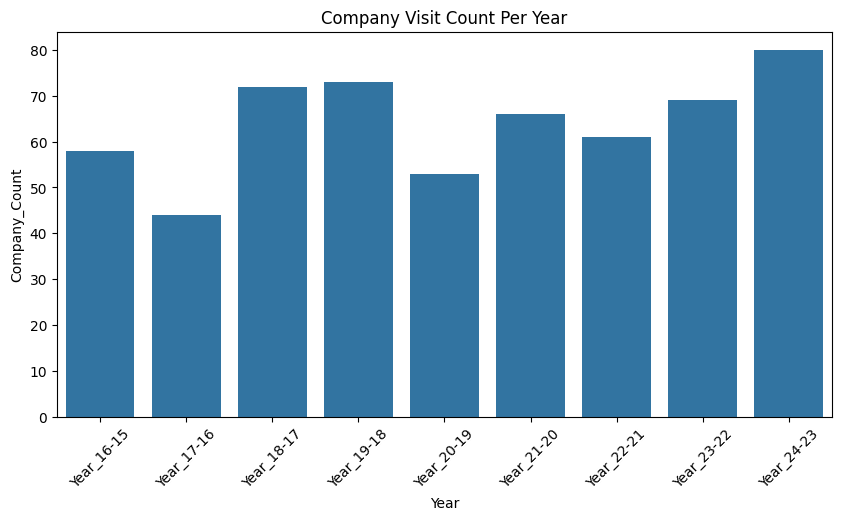

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(data=year_df, x= 'Year', y= 'Company_Count')
plt.title("Company Visit Count Per Year")
plt.xticks(rotation=45)
plt.show()

 By the above code we have visualised several topics and generated somany graphs and visually represented so many categories

In [137]:
df_copy.head()


,Company,Total_Selected,CTC_LPA,Company_encoded,Year_2016,Year_2017,Year_2018,Year_2019,Year_2021,Year_2022,Year_2023,Year_2024,Year_20220
0,AMAZON WOW,1,29.0,2,False,False,False,False,False,False,False,True,False
1,Walmart,2,23.0,2,False,False,False,False,False,False,False,True,False
2,Flipkart,1,11.5,1,False,False,False,False,False,False,False,True,False
3,Infosys,3,9.5,4,False,False,False,False,False,False,False,True,False
4,IBM,1,9.0,1,False,False,False,False,False,False,False,True,False


Reshape the Dataset

In [160]:
# Load your feature engineered df_copy
years = ['Year_2016', 'Year_2017', 'Year_2018', 'Year_2019', 
         'Year_2021', 'Year_2022', 'Year_2023', 'Year_2024']


In [162]:
# Create a long-form dataset
long_df = pd.melt(df_copy, 
                  id_vars=['Company', 'Company_encoded', 'CTC_LPA'], 
                  value_vars=years, 
                  var_name='Year', 
                  value_name='Visited')

In [163]:
# Clean 'Year' column
long_df['Year'] = long_df['Year'].str.extract('(\d+)').astype(int)


In [164]:
# Final dataset
print(long_df.head())

      Company  Company_encoded  CTC_LPA  Year  Visited
0  AMAZON WOW                2     29.0  2016    False
1     Walmart                2     23.0  2016    False
2    Flipkart                1     11.5  2016    False
3     Infosys                4      9.5  2016    False
4        IBM                 1      9.0  2016    False


Train-Test Split

In [165]:
# Convert Visited to 0/1
long_df['Visited'] = long_df['Visited'].astype(int)
long_df['Visited']

0       0
1       0
2       0
3       0
4       0
       ..
4603    0
4604    0
4605    0
4606    0
4607    0
Name: Visited, Length: 4608, dtype: int64

In [166]:
# Define features and target
X = long_df[['Company_encoded', 'Year']]
y = long_df['Visited']


In [167]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### Train Classification Model

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [188]:
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [189]:
y_pred = clf.predict(X_test)

In [190]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6279826464208242
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       817
           1       0.13      0.40      0.20       105

    accuracy                           0.63       922
   macro avg       0.51      0.53      0.48       922
weighted avg       0.81      0.63      0.69       922



### Regression Model for CTC Prediction


We will only use the rows where Visited == 1 for regression.

In [191]:
visited_df = long_df[long_df['Visited'] == 1]


In [192]:
X_ctc = visited_df[['Company_encoded', 'Year']]
y_ctc = visited_df['CTC_LPA']


In [193]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [194]:
reg = RandomForestRegressor(random_state=42)
reg.fit(X_ctc, y_ctc)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Predict Future Placements

In [195]:
future_year = 2025
companies = df_copy[['Company', 'Company_encoded']].drop_duplicates()


In [196]:
future_df = companies.copy()
future_df['Year'] = future_year


In [197]:
# Predict visit
future_df['Will_Visit'] = clf.predict(future_df[['Company_encoded', 'Year']])


In [198]:
# Initialize Expected_CTC
future_df['Expected_CTC'] = 0.0


In [199]:
# Only predict CTC if there are companies predicted to visit
will_visit_df = future_df[future_df['Will_Visit'] == 1]


In [200]:
if not will_visit_df.empty:
    future_df.loc[future_df['Will_Visit'] == 1, 'Expected_CTC'] = reg.predict(
        will_visit_df[['Company_encoded', 'Year']]
    )
else:
    print("⚠️ No companies were visited to the college")

In [201]:
print(future_df[future_df['Will_Visit'] == 1])

               Company  Company_encoded  Year  Will_Visit  Expected_CTC
2             Flipkart                1  2025           1      4.314428
4                 IBM                 1  2025           1      4.314428
5    TCS NQT - (Prime)                1  2025           1      4.314428
6           Baby Cloud                1  2025           1      4.314428
7        Meru Data LLP                1  2025           1      4.314428
..                 ...              ...   ...         ...           ...
569            Raydeon                1  2025           1      4.314428
570              Bosch                1  2025           1      4.314428
571        R K Venuzia                1  2025           1      4.314428
574               RMSI                1  2025           1      4.314428
575             ETOUCH                1  2025           1      4.314428

[420 rows x 5 columns]


In [203]:
# Assuming you still have df_copy loaded
company_map = dict(df_copy[['Company', 'Company_encoded']].drop_duplicates().values.tolist())


In [204]:
joblib.dump(company_map, 'company_map.pkl')


['company_map.pkl']

Save Model

In [202]:
import joblib

# Save the models
joblib.dump(clf, 'placement_classifier.pkl')
joblib.dump(reg, 'placement_regressor.pkl')


['placement_regressor.pkl']